In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PACKAGES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
gold_data = pd.read_csv('/content/drive/MyDrive/goldstock.csv')

In [5]:
gold_data.shape

(2511, 7)

**DATA PREPROCESSING**

In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [ ]:
gold_data.sort_values('Date', inplace=True)

In [ ]:
gold_data.fillna(gold_data.mean(), inplace=True)

<ipython-input-6-c612ac59016d>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  gold_data.fillna(gold_data.mean(), inplace=True)


In [ ]:
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day

In [ ]:
print("First 5 rows of the dataset:")
gold_data.head()

First 5 rows of the dataset:


,Unnamed: 0,Date,Close,Volume,Open,High,Low,Year,Month,Day
2510,2532,2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5,2014,1,22
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8,2014,1,23
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9,2014,1,24
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0,2014,1,27
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0,2014,1,28


In [ ]:
gold_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
print("\nInformation about the dataset:")
print(gold_data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 2510 to 0
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2511 non-null   datetime64[ns]
 1   Close   2511 non-null   float64       
 2   Volume  2511 non-null   float64       
 3   Open    2511 non-null   float64       
 4   High    2511 non-null   float64       
 5   Low     2511 non-null   float64       
 6   Year    2511 non-null   int64         
 7   Month   2511 non-null   int64         
 8   Day     2511 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 196.2 KB
None


In [ ]:
print("Summary statistics of numerical columns:")
print(gold_data.describe())

Summary statistics of numerical columns:
             Close         Volume         Open         High          Low  \
count  2511.000000    2511.000000  2511.000000  2511.000000  2511.000000   
mean   1498.726085  185970.770609  1498.725528  1508.451454  1488.869932   
std     298.824811   97600.769382   299.118187   301.262244   296.417703   
min    1049.600000       1.000000  1051.500000  1062.700000  1045.400000   
25%    1249.850000  126693.500000  1249.500000  1257.300000  1242.350000   
50%    1332.800000  175421.000000  1334.000000  1342.400000  1326.600000   
75%    1805.850000  234832.000000  1805.600000  1815.450000  1793.050000   
max    2093.100000  787217.000000  2094.400000  2098.200000  2074.600000   

              Year        Month          Day  
count  2511.000000  2511.000000  2511.000000  
mean   2018.543608     6.550378    15.700916  
std       2.880279     3.434729     8.774020  
min    2014.000000     1.000000     1.000000  
25%    2016.000000     4.000000     8.0

In [ ]:
print("Number of duplicate rows before removal:", gold_data.duplicated().sum())

Number of duplicate rows before removal: 18


In [ ]:
gold_data.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", gold_data.duplicated().sum())

Number of duplicate rows after removal: 0


**DATA VISUALIZATION**

<ipython-input-14-3e23a8b8c7d0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gold_data.corr(), annot=True, cmap='inferno', linewidths=.5)


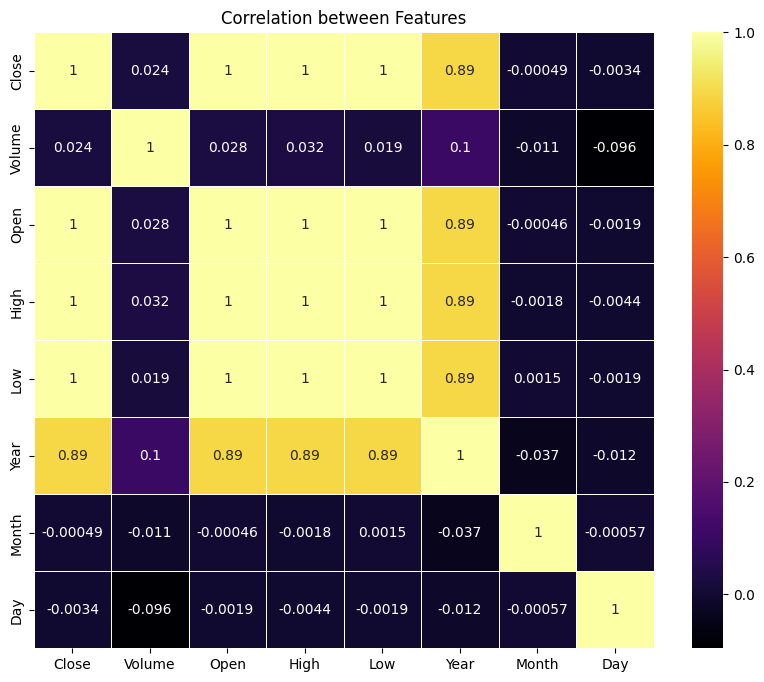

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(gold_data.corr(), annot=True, cmap='inferno', linewidths=.5)
plt.title("Correlation between Features")
plt.show()

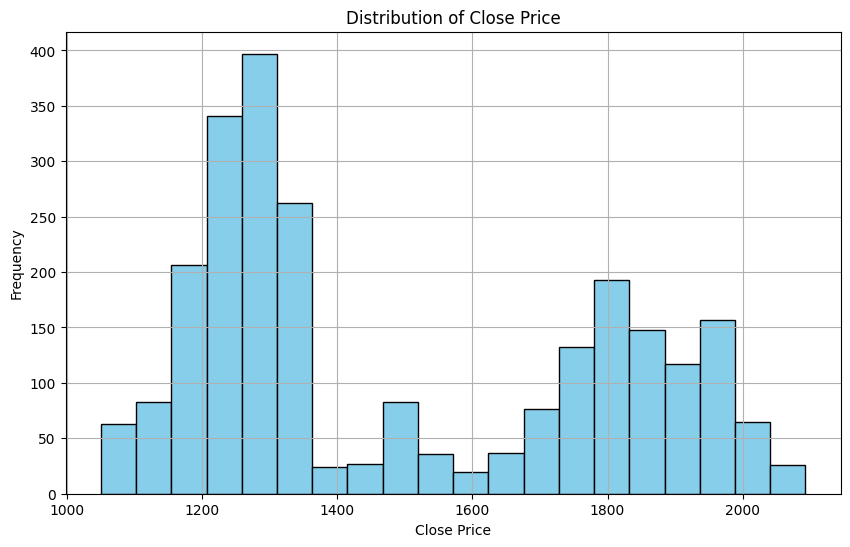

In [ ]:
# Visualize the distribution of the target variable (Close price)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(gold_data['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

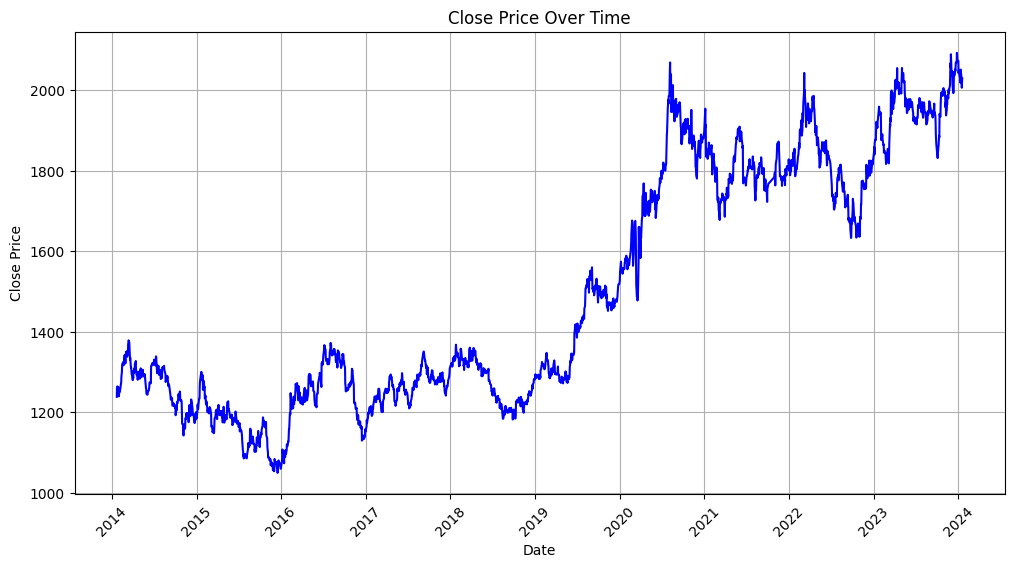

In [ ]:
# Visualize the trend of Close price over time
plt.figure(figsize=(12,6))
plt.plot(gold_data['Date'], gold_data['Close'], color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


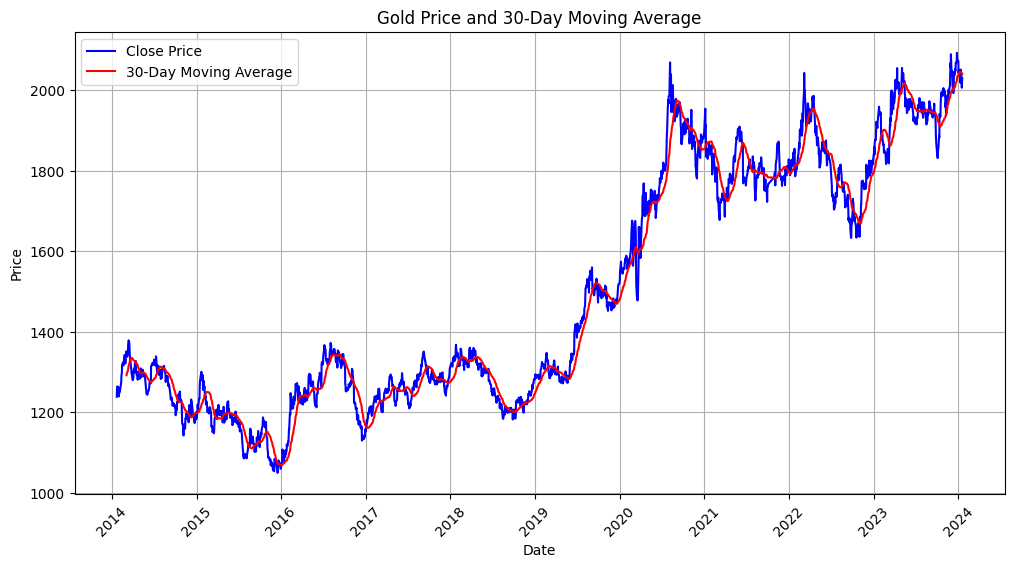

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Date'], gold_data['Close'], label='Close Price', color='blue')
plt.plot(gold_data['Date'], gold_data['Close'].rolling(window=30).mean(), label='30-Day Moving Average', color='red')
plt.title('Gold Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


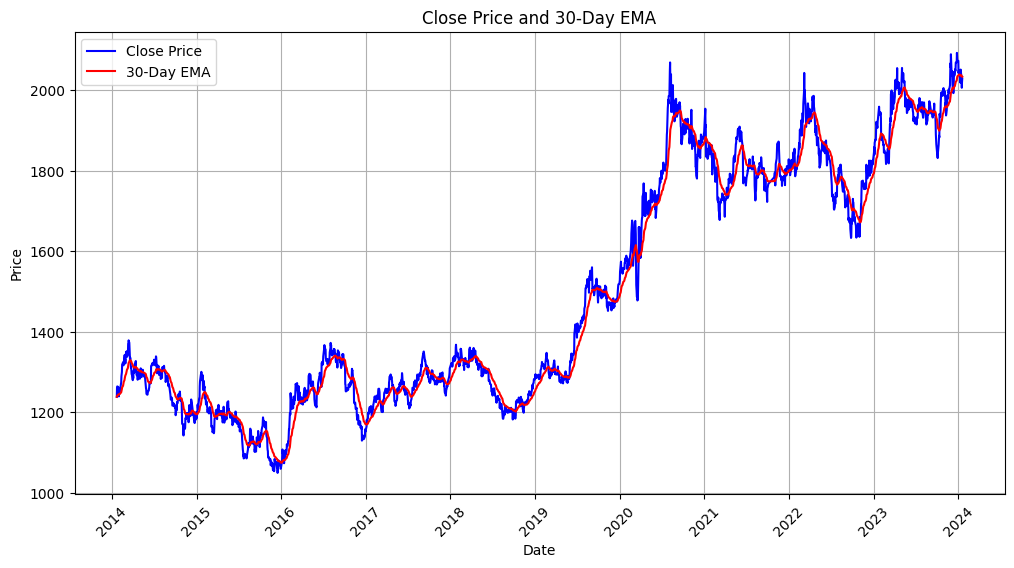

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Date'], gold_data['Close'], label='Close Price', color='blue')
plt.plot(gold_data['Date'], gold_data['Close'].ewm(span=30, adjust=False).mean(), label='30-Day EMA', color='red')
plt.title('Close Price and 30-Day EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


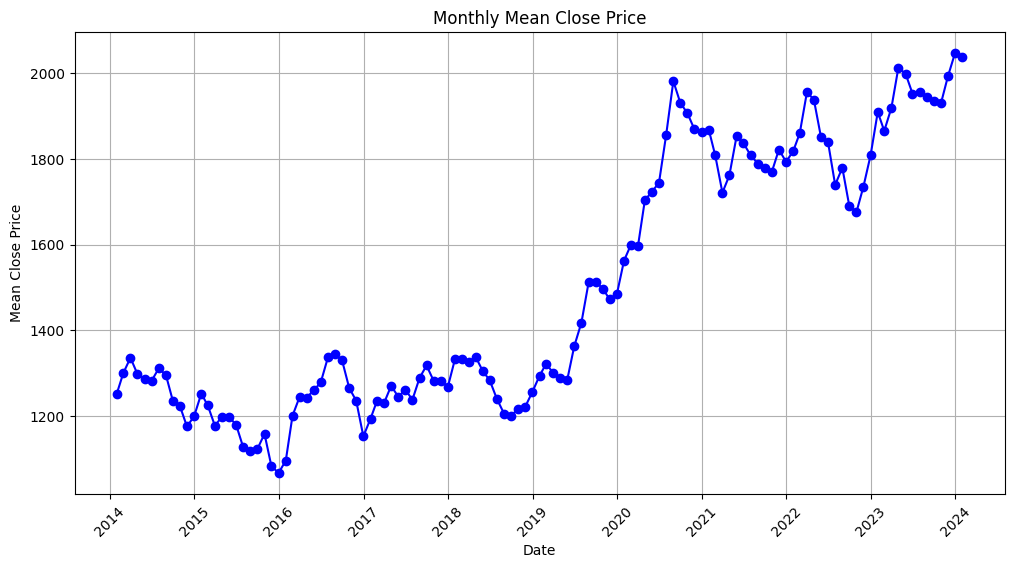

In [ ]:
# Resample data to monthly frequency and calculate mean
monthly_data = gold_data.resample('M', on='Date').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Close'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Mean Close Price')
plt.xlabel('Date')
plt.ylabel('Mean Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


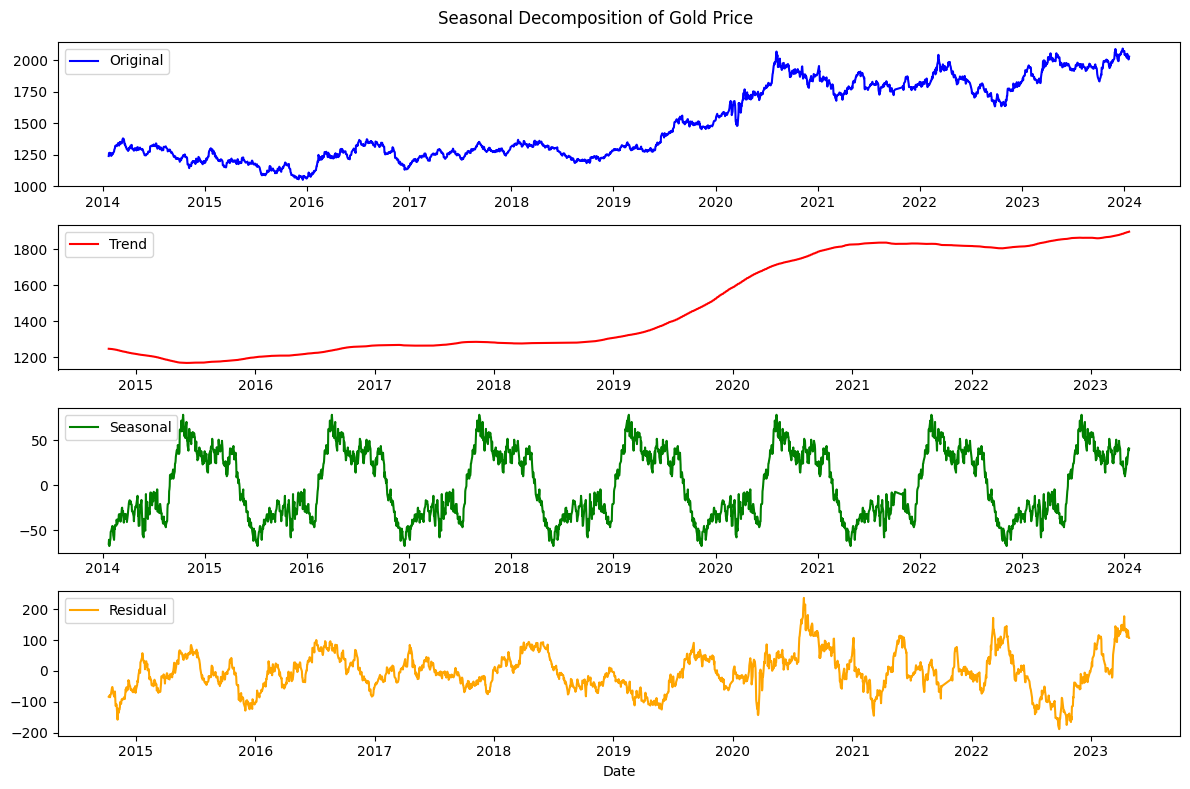

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(gold_data['Close'], period=365, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(gold_data['Date'], gold_data['Close'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(gold_data['Date'], decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(gold_data['Date'], decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(gold_data['Date'], decomposition.resid, label='Residual', color='orange')
plt.legend(loc='upper left')

plt.suptitle('Seasonal Decomposition of Gold Price')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [ ]:
gold_data.drop('Date', axis=1, inplace=True)

In [ ]:
gold_data.head()

,Close,Volume,Open,High,Low,Year,Month,Day
2510,1238.6,80262.0,1240.5,1243.5,1235.5,2014,1,22
2509,1262.5,41697.0,1235.1,1267.1,1230.8,2014,1,23
2508,1264.5,34998.0,1264.3,1273.2,1256.9,2014,1,24
2507,1263.5,63419.0,1269.9,1280.1,1252.0,2014,1,27
2506,1250.5,81426.0,1254.9,1261.9,1248.0,2014,1,28


**TRAIN AND TEST SPLIT**

In [ ]:
X = gold_data[['Volume', 'Open', 'High', 'Low', 'Year', 'Month', 'Day']]
y = gold_data['Close']

In [ ]:
X

,Volume,Open,High,Low,Year,Month,Day
2510,80262.0,1240.5,1243.5,1235.5,2014,1,22
2509,41697.0,1235.1,1267.1,1230.8,2014,1,23
2508,34998.0,1264.3,1273.2,1256.9,2014,1,24
2507,63419.0,1269.9,1280.1,1252.0,2014,1,27
2506,81426.0,1254.9,1261.9,1248.0,2014,1,28
...,...,...,...,...,...,...,...
4,250946.0,2033.2,2067.3,2033.1,2024,1,12
3,277995.0,2053.4,2062.8,2027.6,2024,1,16
2,245194.0,2031.7,2036.1,2004.6,2024,1,17
1,167013.0,2009.1,2025.6,2007.7,2024,1,18


In [ ]:
y

2510    1238.6
2509    1262.5
2508    1264.5
2507    1263.5
2506    1250.5
         ...  
4       2051.6
3       2030.2
2       2006.5
1       2021.6
0       2029.3
Name: Close, Length: 2493, dtype: float64

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**MODEL DEFINITION**

In [ ]:
# Define preprocessing steps
numeric_features = ['Volume', 'Open', 'High', 'Low']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Year', 'Month', 'Day']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor()
}

In [ ]:
# Create a pipeline for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('regressor', model)])

Linear Regression:
  Mean Squared Error: 33.47138505083517
  Mean Absolute Error: 4.3239215079918365
  R-squared Error: 0.9996256369952969




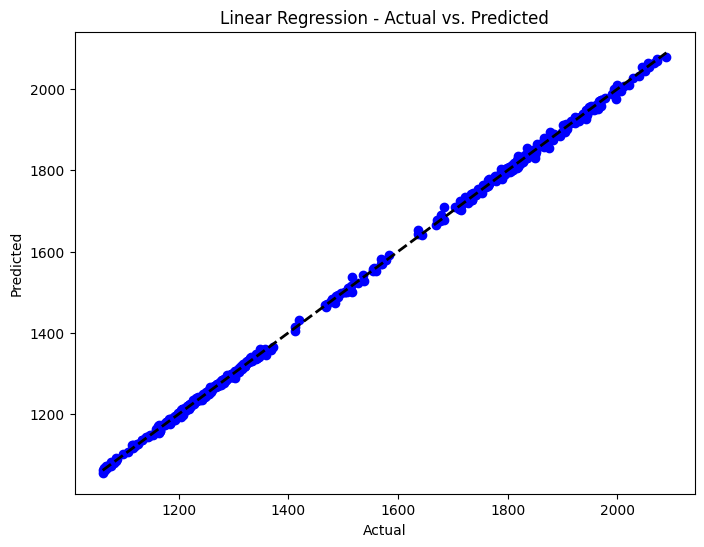

Decision Tree:
  Mean Squared Error: 116.8511823647296
  Mean Absolute Error: 7.070941883767534
  R-squared Error: 0.9986930699262452




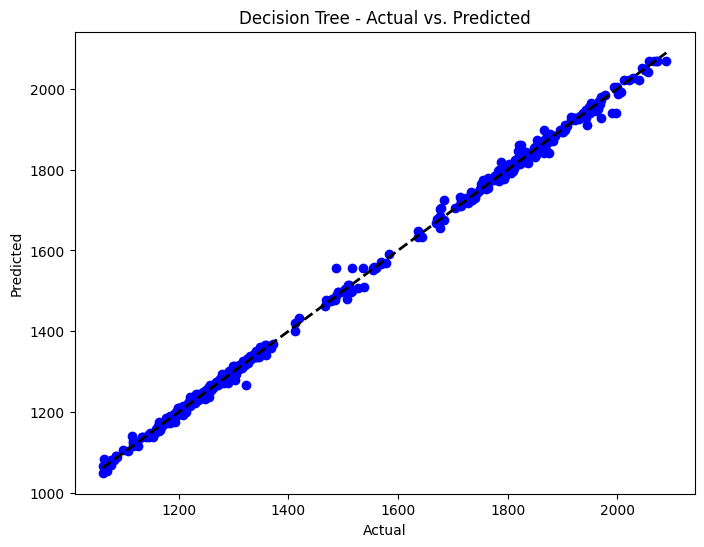

Random Forest:
  Mean Squared Error: 69.23626680160262
  Mean Absolute Error: 5.5188777555109985
  R-squared Error: 0.9992256222192507




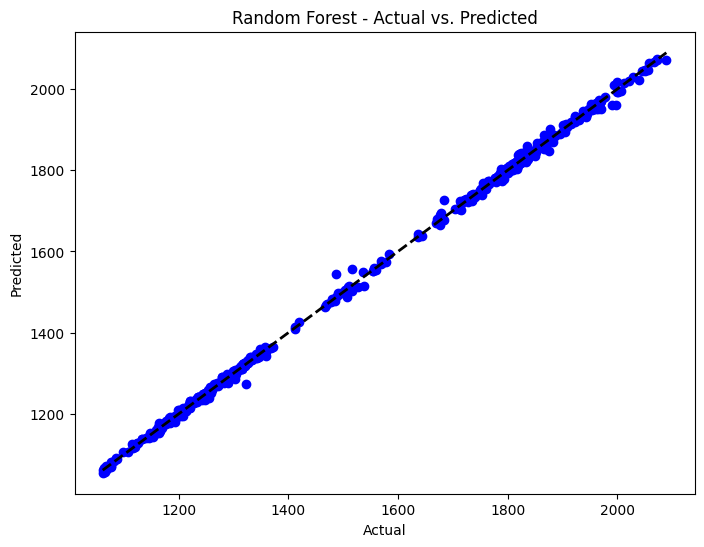

Gradient Boosting:
  Mean Squared Error: 65.75609242206588
  Mean Absolute Error: 5.700374821983664
  R-squared Error: 0.9992645464685949




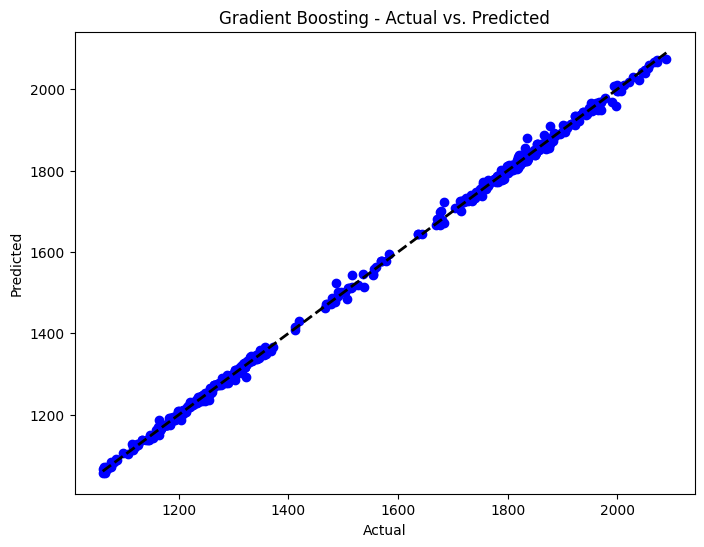

Support Vector Machine:
  Mean Squared Error: 9633.383737385833
  Mean Absolute Error: 67.81704848955964
  R-squared Error: 0.8922547580296397




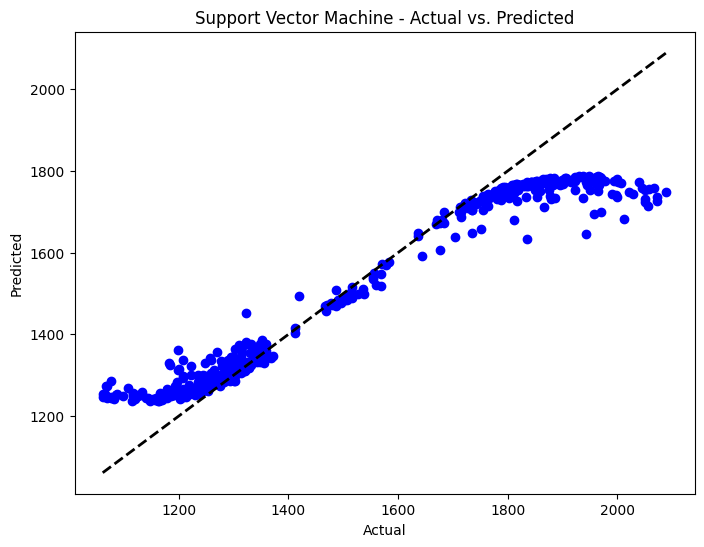

K-Nearest Neighbors:
  Mean Squared Error: 494.77720961923853
  Mean Absolute Error: 15.736472945891784
  R-squared Error: 0.9944661303208595




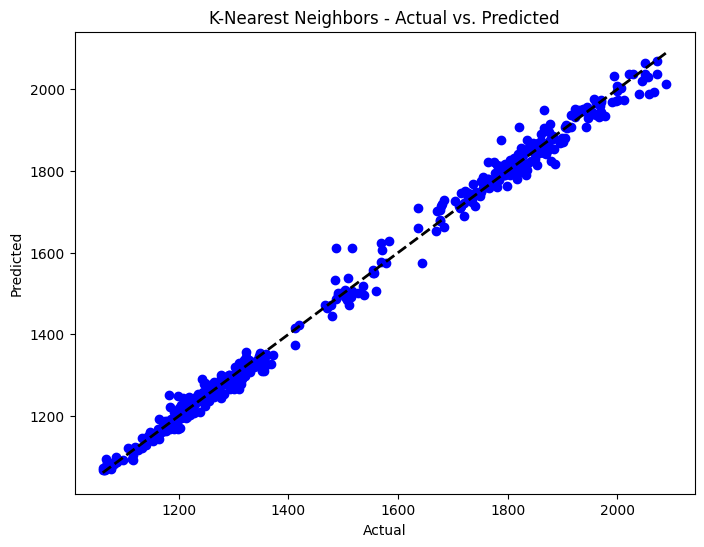

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network:
  Mean Squared Error: 10653.020306543538
  Mean Absolute Error: 102.2362634239491
  R-squared Error: 0.8808505627997363




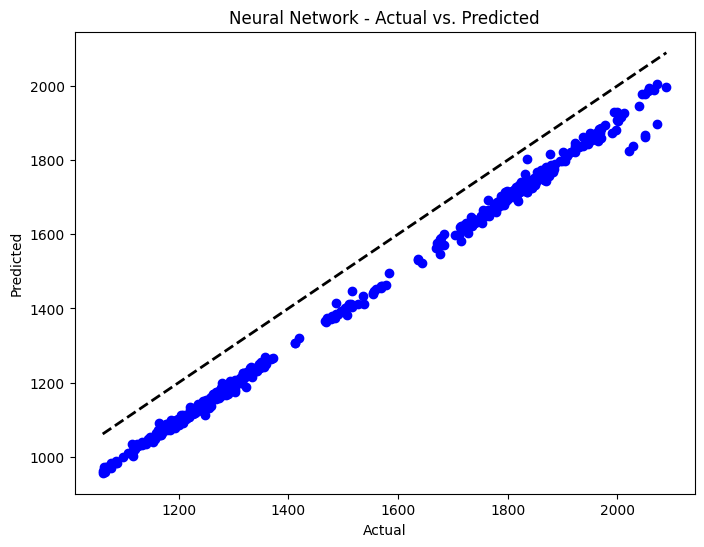

In [ ]:
import matplotlib.pyplot as plt

model_names = []
r2_scores = []

# Train and evaluate models
for name, pipeline in pipelines.items():
    if name != "Neural Network" and name != "Gaussian Process":
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
    else:
        # Convert numpy array to DataFrame for Neural Network and Gaussian Process models
        X_train_df = pd.DataFrame(X_train, columns=X.columns)
        X_test_df = pd.DataFrame(X_test, columns=X.columns)
        pipeline.fit(X_train_df, y_train)
        y_pred = pipeline.predict(X_test_df)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_names.append(name)
    r2_scores.append(r2)
    print(f"{name}:")
    print("  Mean Squared Error:", mse)
    print("  Mean Absolute Error:", mae)
    print("  R-squared Error:", r2)
    print("\n")

    # Visualize actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Actual vs. Predicted')
    plt.show()


In [ ]:
r2_scores

[0.9996256369952969,
 0.9986930699262452,
 0.9992256222192507,
 0.9992645464685949,
 0.8922547580296397,
 0.9944661303208595,
 0.8808505627997363]

In [ ]:
model_names

['Linear Regression',
 'Decision Tree',
 'Random Forest',
 'Gradient Boosting',
 'Support Vector Machine',
 'K-Nearest Neighbors',
 'Neural Network']

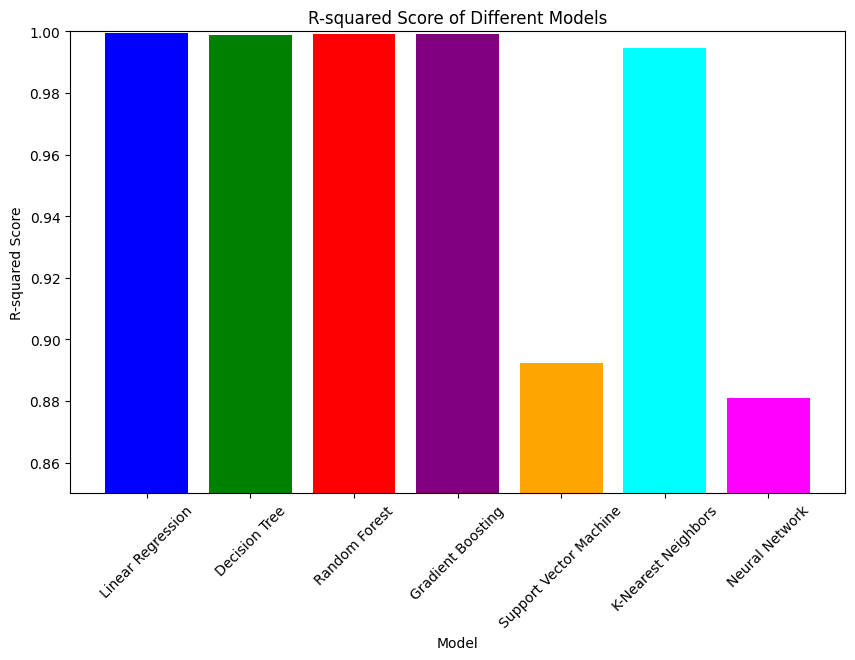

In [ ]:
import matplotlib.pyplot as plt

# Model names and R-squared scores
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbors', 'Neural Network']
r2_scores = [0.9996256369952969, 0.9986930699262452, 0.9992256222192507, 0.9992645464685949, 0.8922547580296397, 0.9944661303208595, 0.8808505627997363]

# Define colors for each model
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']

# Plotting the R-squared scores
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('R-squared Score of Different Models')
plt.xticks(rotation=45)
plt.ylim(0.85, 1.0)
plt.show()
